# e2. You have a wine dataset of 3 wines which has 13 features to define a type of wine. Total number of instances: 177. Apply Logistic Regression on the dataset. (train:test::70:30)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

df1 = pd.read_csv('wine.csv')
df1
df1.describe()
df1.isnull()
# Take a look
print(df1.head(10))
# Data dimensionality (rows, colums)
print(df1.shape)
# Data distributing
df1.info()
data = np.array(df1)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score

df1.head()


   1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   
5  1  14.39  1.87  2.45  14.6   96  2.50  2.52  0.30  1.98  5.25  1.02  3.58   
6  1  14.06  2.15  2.61  17.6  121  2.60  2.51  0.31  1.25  5.05  1.06  3.58   
7  1  14.83  1.64  2.17  14.0   97  2.80  2.98  0.29  1.98  5.20  1.08  2.85   
8  1  13.86  1.35  2.27  16.0   98  2.98  3.15  0.22  1.85  7.22  1.01  3.55   
9  1  14.10  2.16  2.30  18.0  105  2.95  3.32  0.22  2.38  5.75  1.25  3.17   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450  
5  1290  
6  1295  
7  1045  
8  1045  
9  1510  
(177, 14)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [15]:
print(df1['1'].unique())
print(df1.groupby('1').size())

[1 2 3]
1
1    58
2    71
3    48
dtype: int64


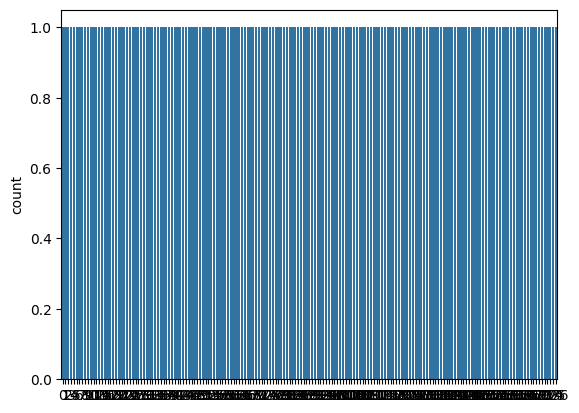

In [36]:
import seaborn as sns
sns.countplot(df1['1'],label="Count")
plt.show()

Why 3 plots?
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [ ]:
df1
df1.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [18]:
from matplotlib import cm
feature_names = ['1.71',	'2.43',	'15.6',	'127']
X = df1[feature_names]
y = df1['1']

Note: In the syntax, estimator refers to the specific estimator or transformer object from Scikit-Learn that is being used. X represents the input data.

Example: Suppose we have a dataset train_data for training and test_data for testing. We can use fit() to learn the parameters from the training data (estimator.fit(train_data)) and then use transform() to apply the learned transformation to the test data (transformed_data = estimator.transform(test_data)). Alternatively, we can use fit_transform() to perform both steps in one (transformed_data = estimator.fit_transform(data)).

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

MinMaxScaler subtracts the minimum value from each data point and then divides the result by the difference between the maximum and minimum values. This results in a dataset with values ranging between 0 and 1

It will calculate the mean(μ)and standard deviation(σ) of the feature F at a time it will transform the data points of the feature F.

In [23]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.74
Accuracy of Logistic regression classifier on test set: 0.73


In [25]:
# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(X_train, y_train)

# predicting the results for the test set
y_pred = model.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7424242424242424
Testing accuracy : 0.7333333333333333
              precision    recall  f1-score   support

           1       0.75      0.75      0.75        16
           2       0.78      0.70      0.74        20
           3       0.64      0.78      0.70         9

    accuracy                           0.73        45
   macro avg       0.72      0.74      0.73        45
weighted avg       0.74      0.73      0.73        45

[[12  3  1]
 [ 3 14  3]
 [ 1  1  7]]


The last [[12 3 1] [3 14 3] [1 1 7]] is the confusion matrix

Text(0.5, 427.9555555555555, 'Predicted label')

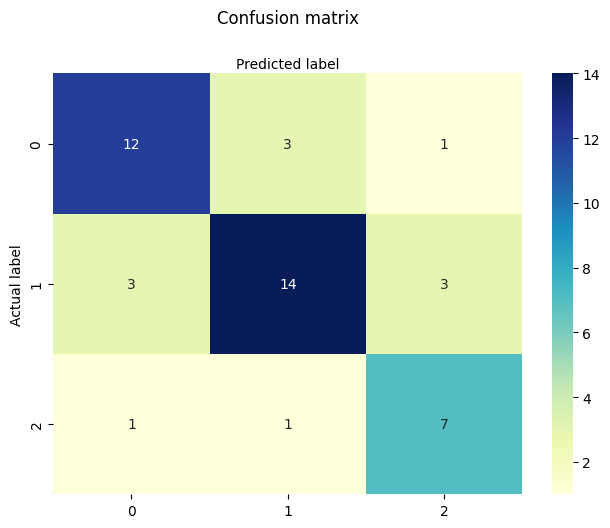

In [26]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')